# Netflix data analysis project

# step1 import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#step 2 import raw input file

In [3]:
df=pd.read_csv(r"C:\Users\Paramita Sen\mymoviedb.csv")

# step2 data cleanup

In [4]:
df.shape

(9837, 9)

In [5]:
df.columns

Index(['Release_Date', 'Title', 'Overview', 'Popularity', 'Vote_Count',
       'Vote_Average', 'Original_Language', 'Genre', 'Poster_Url'],
      dtype='object')

In [6]:
df.head(5)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,15-12-2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,01-03-2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,25-02-2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,24-11-2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,22-12-2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [8]:
#conclusion:overview,original language and poster url wont be so useful during analysis, so will drop them

In [9]:
df.drop(['Overview','Original_Language','Poster_Url'], axis=1,inplace=True)

In [10]:
df.isnull().sum()

Release_Date     0
Title            9
Popularity      10
Vote_Count      10
Vote_Average    10
Genre           11
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [13]:
df.shape

(9826, 6)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9826 entries, 0 to 9836
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Release_Date  9826 non-null   object 
 1   Title         9826 non-null   object 
 2   Popularity    9826 non-null   float64
 3   Vote_Count    9826 non-null   object 
 4   Vote_Average  9826 non-null   object 
 5   Genre         9826 non-null   object 
dtypes: float64(1), object(5)
memory usage: 537.4+ KB


In [15]:
df['Vote_Count']=df['Vote_Count'].astype('int')
df['Vote_Average']=df['Vote_Average'].astype('float64')

In [16]:
#conclusions:change Release_Date data type from string/object to Date

In [17]:
df['Genre'].head(5)

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [18]:
#conclusion:Genre column has commaa space separated data that needs to be casted into category exploration summary

In [19]:
df.duplicated().sum()

0

In [20]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9826.000000,9826.000000,9826.000000
mean,40.323951,1392.943721,6.439467
std,108.879332,2611.303856,1.129797
min,13.354000,0.000000,0.000000
25%,16.128250,146.000000,5.900000
50%,21.195000,444.000000,6.500000
75%,35.179250,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [21]:
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [22]:
#convert date from object to just year in int formate

In [23]:
df['Release_Date']=pd.to_datetime(df['Release_Date'])

C:\Users\Paramita Sen\AppData\Local\Temp\ipykernel_16184\3905815248.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Release_Date']=pd.to_datetime(df['Release_Date'])


In [24]:
df['Release_Date'].dtypes

dtype('<M8[ns]')

In [25]:
df['Release_Date']

0      2021-12-15
1      2022-03-01
2      2022-02-25
3      2021-11-24
4      2021-12-22
          ...    
9832   1973-10-15
9833   2020-10-01
9834   2016-05-06
9835   2021-03-31
9836   1984-09-23
Name: Release_Date, Length: 9826, dtype: datetime64[ns]

In [26]:
df['Release_Date']=df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

In [27]:
df['Release_Date']

0       2021
1       2022
2       2022
3       2021
4       2021
        ... 
9832    1973
9833    2020
9834    2016
9835    2021
9836    1984
Name: Release_Date, Length: 9826, dtype: int32

In [28]:
#converting Vote_Average into labels - Popular,average,below average,not popular

In [29]:
def catgorize_col(df,col,labels):
    
    edges=[df[col].describe()['min'],
           df[col].describe()['25%'],
           df[col].describe()['50%'],
           df[col].describe()['75%'],
           df[col].describe()['max']]
    df[col]=pd.cut(df[col],edges,labels=labels,duplicates='drop')
    return df

In [30]:
labels=['Not_Popular','Below_Average','Average','Popular']

In [31]:
catgorize_col(df,'Vote_Average',labels)
df['Vote_Average'].unique()

['Popular', 'Below_Average', 'Average', 'Not_Popular', NaN]
Categories (4, object): ['Not_Popular' < 'Below_Average' < 'Average' < 'Popular']

In [32]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Below_Average,Thriller
3,2021,Encanto,2402.201,5076,Popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Average,"Action, Adventure, Thriller, War"


In [33]:
df['Vote_Average'].value_counts()

Vote_Average
Not_Popular      2467
Popular          2450
Average          2411
Below_Average    2398
Name: count, dtype: int64

In [34]:
df.dropna(inplace=True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [35]:
#conclusion:seprate Genre
#split genres into list & explore dataframe to have only one genre per row for movies

In [36]:
df['Genre']=df['Genre'].str.split(', ')
df=df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


In [37]:
#casting column into category

In [38]:
df['Genre']=df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25551 non-null  int32   
 1   Title         25551 non-null  object  
 2   Popularity    25551 non-null  float64 
 3   Vote_Count    25551 non-null  int32   
 4   Vote_Average  25551 non-null  category
 5   Genre         25551 non-null  category
dtypes: category(2), float64(1), int32(2), object(1)
memory usage: 649.8+ KB


In [40]:
df.nunique()

Release_Date     100
Title           9414
Popularity      8087
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

# step3:Data visualisation for insights

In [41]:
sns.set_style('whitegrid')

In [42]:
#most frequest genre of movies released on netflix?

In [43]:
df['Genre'].describe()

count     25551
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

C:\Users\Paramita Sen\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Gener distribution')

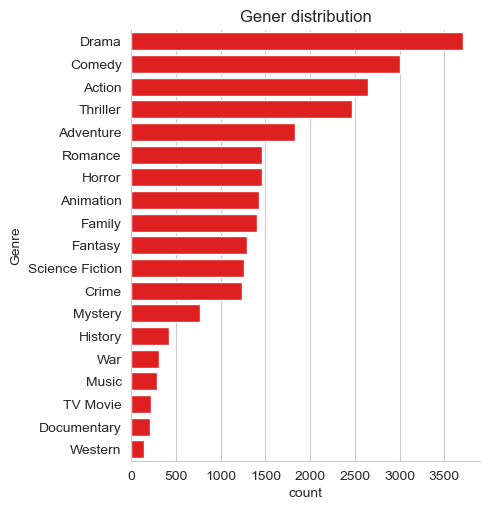

In [44]:
sns.catplot(y='Genre',data=df,kind='count',order=df['Genre'].value_counts().index,color='red')
plt.title('Gener distribution')

In [45]:
#which has highest votes in vote avg column?

In [46]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


C:\Users\Paramita Sen\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


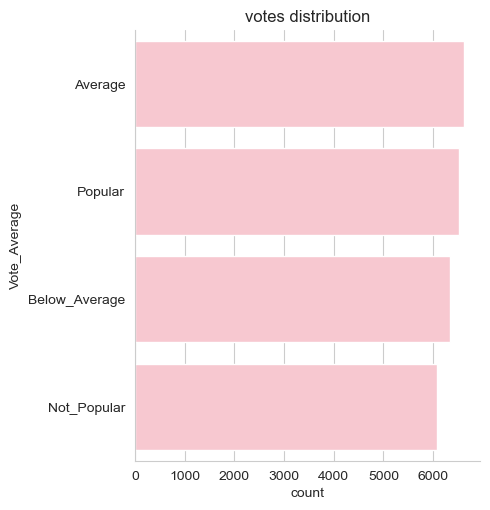

In [47]:
sns.catplot(y='Vote_Average',data=df,kind='count',
           order=df['Vote_Average'].value_counts().index,
           color='pink')
plt.title('votes distribution')
plt.show()

In [48]:
#which movie got highest popularity?whats its genre?

In [49]:
df[df['Popularity']==df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction


In [50]:
#which movie got lowest popularity?whats its genre?

In [51]:
df[df['Popularity']==df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25545,2021,The United States vs. Billie Holiday,13.354,152,Average,Music
25546,2021,The United States vs. Billie Holiday,13.354,152,Average,Drama
25547,2021,The United States vs. Billie Holiday,13.354,152,Average,History
25548,1984,Threads,13.354,186,Popular,War
25549,1984,Threads,13.354,186,Popular,Drama
25550,1984,Threads,13.354,186,Popular,Science Fiction


In [52]:
#which year has most filmed movies?

Text(0.5, 1.0, 'release date column distribution')

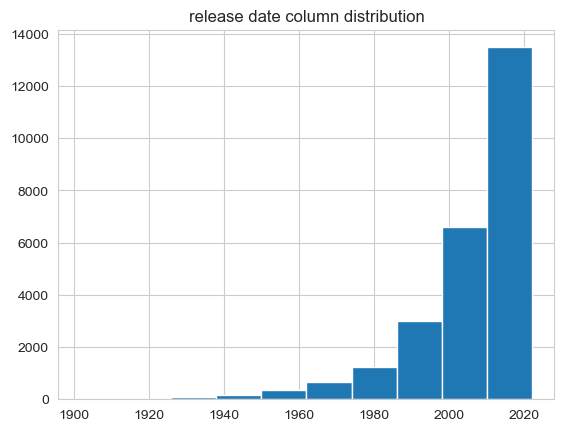

In [53]:
df['Release_Date'].hist()
plt.title("release date column distribution")

# step4:summarize/conclusions

In [54]:
#1)Drama Genre is the most frequent genre in dataset & appeared more then 14% times among 19 other genres
#2)Drama Genre have highest popularity among fans
#3)Spider man no way home movie got highest popularity rating & its genre are Action, Adventure, Science Fiction
#4)The United States vs. Billie Holiday , Threads got least popularity movies
#5)2020 year has highest fiming rates in our dataset

# Thankyou